In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


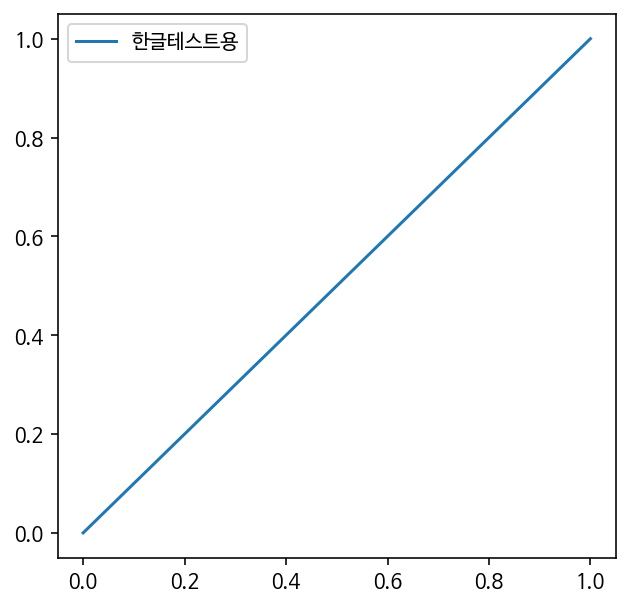

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/빅청캠/real_final.csv')
df.head()

,도시,공사,modified공종명,설계수량,설계재료비단가,설계노무비단가,설계경비단가,설계합계금액,도급수량,도급재료비단가,도급노무비단가,도급경비단가,도급합계금액,공구별면적,주거면적,주거면적(%),공구별세대수,착공연도,준공연도,기간(월),x,y,hdb_clusters
0,광교1,구조물공사,강관파일기초,7337.0,1312053.0,611151.0,25142.0,4.488065e+09,7337.0,920662.0,459434.0,19325.0,3.257416e+09,1067184.0,604873.6,56.67941,9177.0,200710,201105,43.0,-24.076591,21.306380,254
1,광교1,구조물공사,되메우기및다짐,8973.0,415.0,1675.0,236.0,2.087120e+07,8973.0,212.0,816.0,367.0,1.251734e+07,1067184.0,604873.6,56.67941,9177.0,200710,201105,43.0,39.149840,-23.925344,292
2,광교1,구조물공사,뒷채움부설및다짐,1558.0,419.0,4200.0,393.0,7.808696e+06,1558.0,214.0,2049.0,615.0,4.483924e+06,1067184.0,604873.6,56.67941,9177.0,200710,201105,43.0,-6.275611,-40.735214,1019
3,광교1,구조물공사,보강토옹벽,402.0,295266.0,140498.0,10444.0,9.059399e+07,402.0,151507.0,68524.0,16391.0,4.757870e+07,1067184.0,604873.6,56.67941,9177.0,200710,201105,43.0,34.260254,23.648280,260
4,광교1,구조물공사,식생옹벽블럭,341.0,171792.0,29126.0,14282.0,7.338320e+07,341.0,88150.0,14205.0,22416.0,4.254691e+07,1067184.0,604873.6,56.67941,9177.0,200710,201105,43.0,27.405354,22.553220,265


---

In [ ]:
df['설계단가합계'] = df[['설계재료비단가', '설계노무비단가','설계경비단가']].sum(axis=1)
df['도급단가합계'] = df[['도급재료비단가', '도급노무비단가','설계경비단가']].sum(axis=1)

In [ ]:
df=df[df['도급단가합계']>0]

# 공구별 합계금액 변화 

메인 공사금액 비교
- 1차 메인 공사: 도로및포장공사,오수공사,우수공사,토공사,부대공사
- 2차 메인 공사: 구조물공사,교량공사,상수공사,가로수식재공사
- 3차 메인 공사: 하천공사,상수도공사,기타도로공사,가로수유지관리공사

---

우선 전체 공구별 공사에 대한 분포를 확인해 보자.

In [ ]:
df_sum=df.groupby(['도시','공사'])[['설계단가합계','도급단가합계','설계수량','도급수량']].sum().reset_index()
df_sum.head()

,도시,공사,설계단가합계,도급단가합계,설계수량,도급수량
0,광교1,구조물공사,2830432.0,1878677.0,33730.0,33730.0
1,광교1,기타도로공사,61425156.0,47714956.0,944303.0,944112.0
2,광교1,도로및포장공사,76582711.0,83441762.0,713339.0,713339.0
3,광교1,부대공사,445402884.0,254456195.0,31714.0,31714.0
4,광교1,상수공사,214225062.0,155975593.0,72615.0,72616.0


In [ ]:
df_sum

,도시,공사,설계단가합계,도급단가합계,설계수량,도급수량
0,광교1,구조물공사,2.830432e+06,1.878677e+06,3.373000e+04,3.373000e+04
1,광교1,기타도로공사,6.142516e+07,4.771496e+07,9.443030e+05,9.441120e+05
2,광교1,도로및포장공사,7.658271e+07,8.344176e+07,7.133390e+05,7.133390e+05
3,광교1,부대공사,4.454029e+08,2.544562e+08,3.171400e+04,3.171400e+04
4,광교1,상수공사,2.142251e+08,1.559756e+08,7.261500e+04,7.261600e+04
5,광교1,오수공사,3.350489e+07,2.447758e+07,1.131880e+05,1.131880e+05
6,광교1,우수공사,5.998963e+07,4.240582e+07,1.398480e+05,1.398480e+05
7,광교1,토공사,2.268694e+07,2.019112e+07,8.915640e+06,8.915640e+06
8,다산1,가로수식재공사,1.139424e+07,1.131958e+07,2.902011e+05,2.902011e+05
9,다산1,구조물공사,1.991861e+07,2.015858e+07,3.770758e+04,3.770758e+04


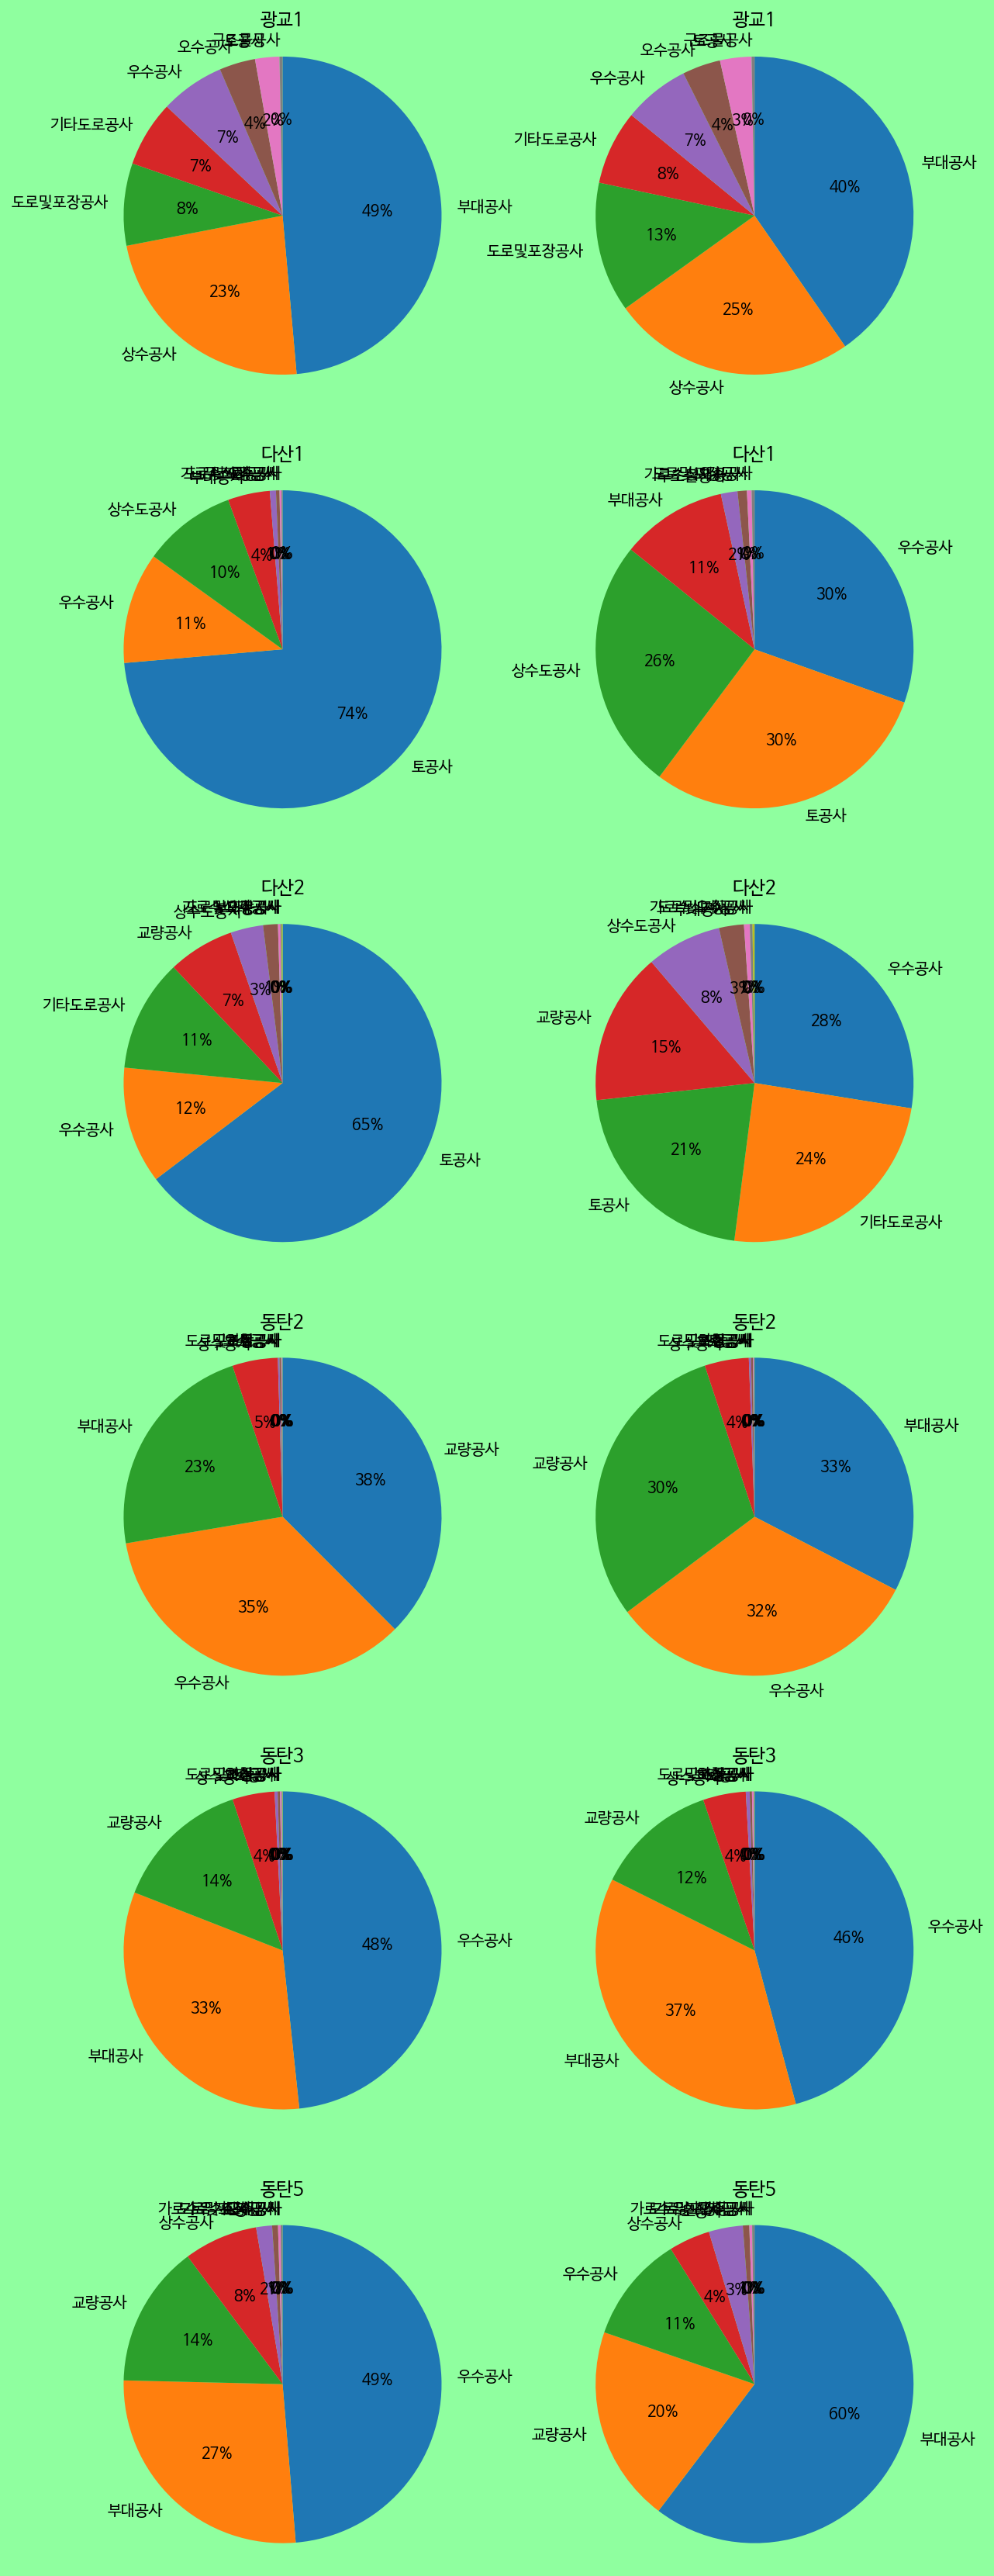

In [ ]:
fig,axs = plt.subplots(6, 2)
fig.set_size_inches(10,30)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(df_sum['도시'].unique()):
  axs[idx,0].pie(df_sum[df_sum['도시']==city].sort_values('설계단가합계',ascending=False)['설계단가합계'],autopct='%.0f%%',
          labels= df_sum[df_sum['도시']==city].sort_values('설계단가합계',ascending=False)['공사'],
          radius= 1.1,
          startangle=90,counterclock=False)
  axs[idx,0].title.set_text(city)
  axs[idx,1].pie(df_sum[df_sum['도시']==city].sort_values('도급단가합계',ascending=False)['도급단가합계'],autopct='%.0f%%',
          labels= df_sum[df_sum['도시']==city].sort_values('도급단가합계',ascending=False)['공사'],
          radius= 1.1,
          startangle=90,counterclock=False)
  axs[idx,1].title.set_text(city)
plt.show()

In [ ]:
df_sum=df.groupby(['도시','공사'])[['설계합계금액','도급합계금액','설계수량','도급수량']].sum().reset_index()
df_sum.head()

,도시,공사,설계합계금액,도급합계금액,설계수량,도급수량
0,광교1,구조물공사,4.799310e+09,3.445348e+09,33730.0,33730.0
1,광교1,기타도로공사,2.585285e+09,1.894758e+09,944303.0,944112.0
2,광교1,도로및포장공사,4.863917e+09,3.345553e+09,713339.0,713339.0
3,광교1,부대공사,2.519058e+10,1.437637e+10,31714.0,31714.0
4,광교1,상수공사,2.365153e+09,1.729457e+09,72615.0,72616.0


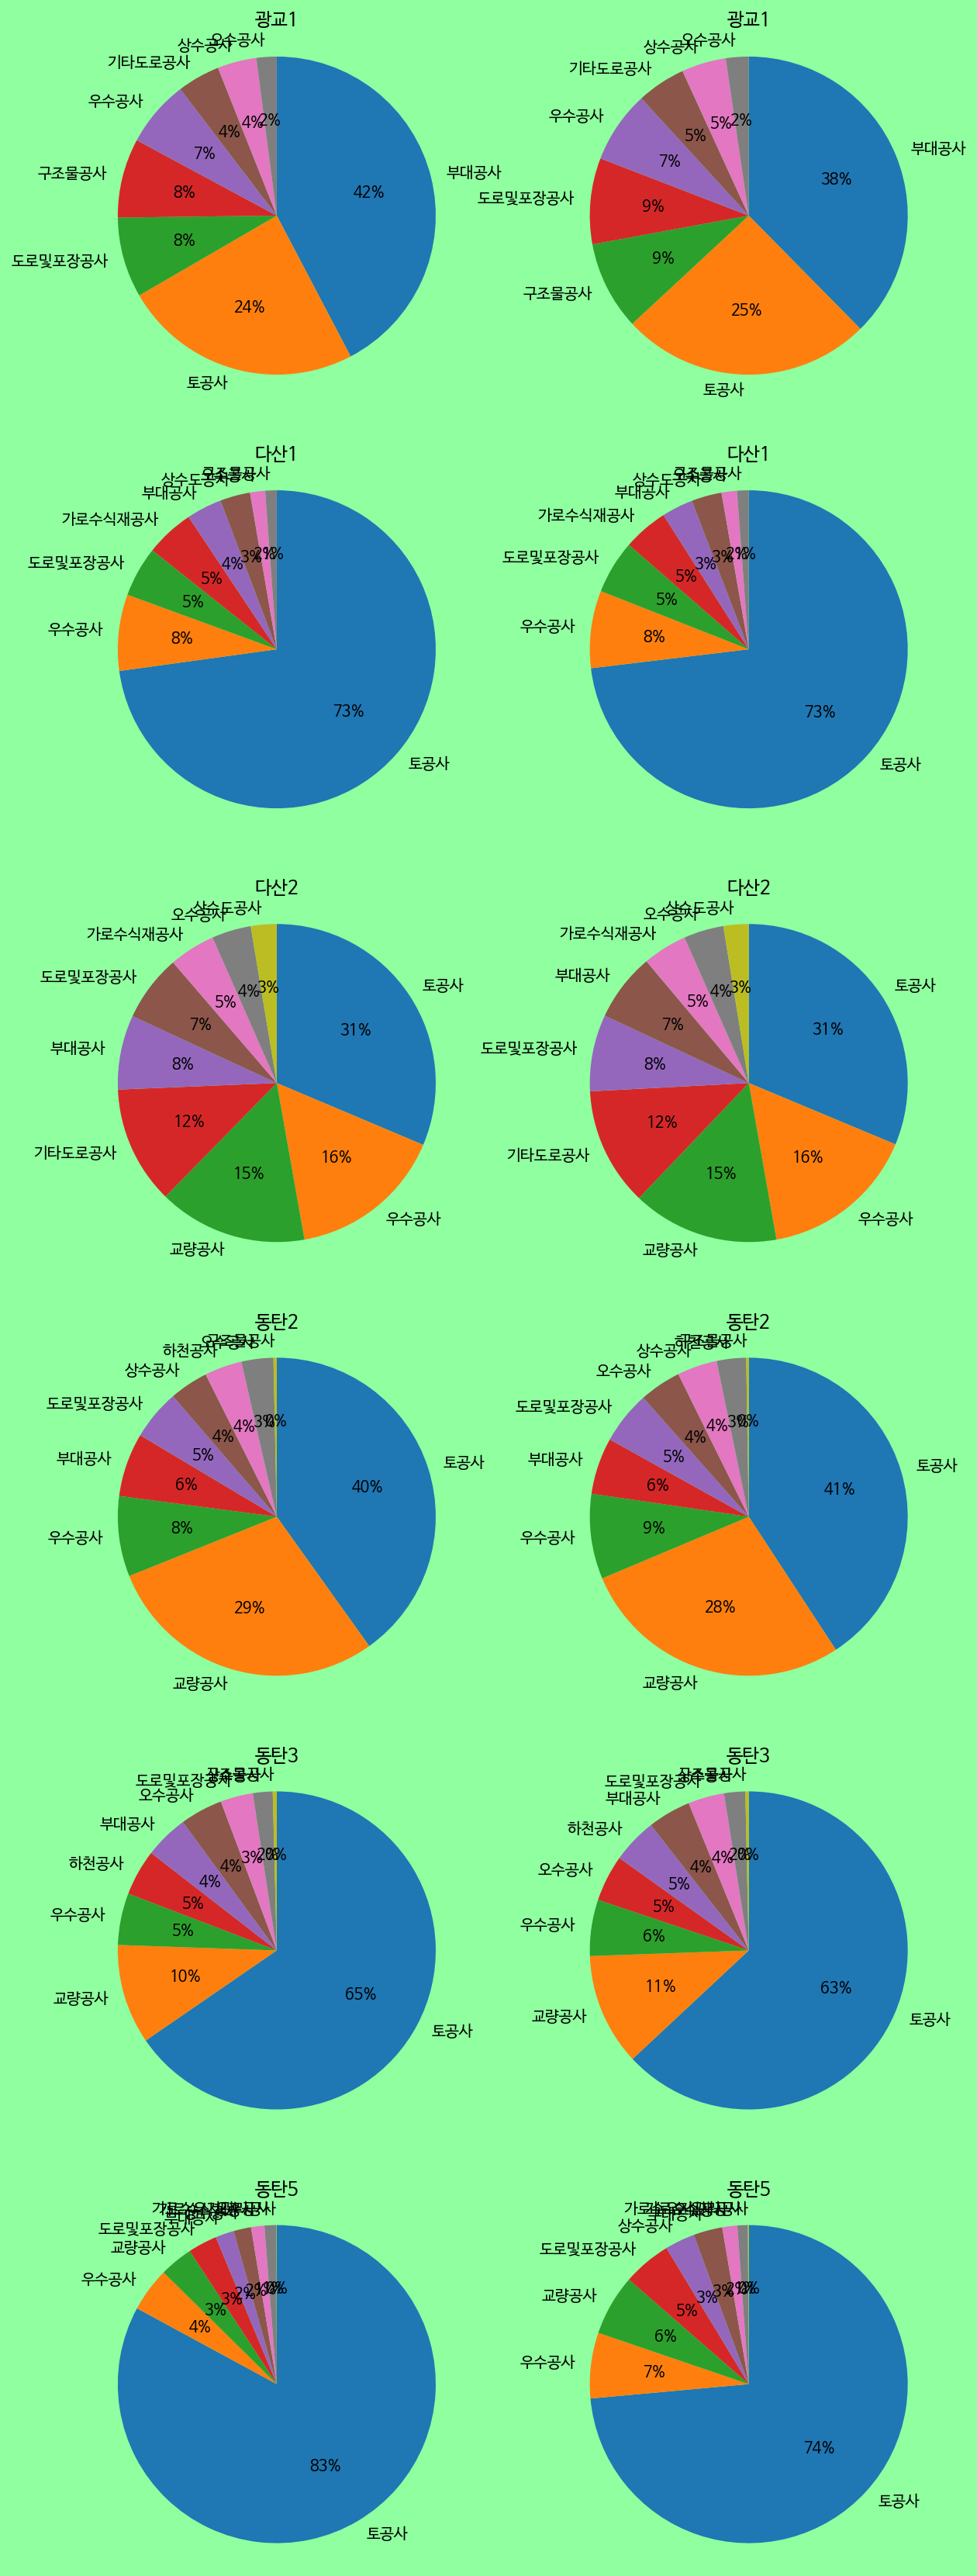

In [ ]:
fig,axs = plt.subplots(6, 2)
fig.set_size_inches(10,30)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(df_sum['도시'].unique()):
  axs[idx,0].pie(df_sum[df_sum['도시']==city].sort_values('설계합계금액',ascending=False)['설계합계금액'],autopct='%.0f%%',
          labels= df_sum[df_sum['도시']==city].sort_values('설계합계금액',ascending=False)['공사'],
          radius= 1.1,
          startangle=90,counterclock=False)
  axs[idx,0].title.set_text(city)
  axs[idx,1].pie(df_sum[df_sum['도시']==city].sort_values('도급합계금액',ascending=False)['도급합계금액'],autopct='%.0f%%',
          labels= df_sum[df_sum['도시']==city].sort_values('도급합계금액',ascending=False)['공사'],
          radius= 1.1,
          startangle=90,counterclock=False)
  axs[idx,1].title.set_text(city)
plt.show()

동탄5공구의 설게내역서와 도급내역서의 공사별 금액 비율이 차이가 많이 나는 것으로 보인다. 이를 파악하기 위해 어떤 공종들의 영향이 컸는지 확인해 보는 것이 좋아 보인다.

# [도시] Flow Check

In [ ]:
all_flow=df.groupby(['도시'])[['설계수량','도급수량','설계재료비단가','설계노무비단가','설계경비단가','도급재료비단가','도급노무비단가','도급경비단가']].sum().reset_index()

In [ ]:
all_flow=all_flow.merge(df[['도시','공구별면적','주거면적','주거면적(%)','공구별세대수','기간(월)']],on='도시',how='left').drop_duplicates()

In [ ]:
all_flow['설계단가합계'] = all_flow['설계재료비단가']+all_flow['설계노무비단가']+all_flow['설계경비단가']
all_flow['도급단가합계'] = all_flow['도급재료비단가']+all_flow['도급노무비단가']+all_flow['도급경비단가']
all_flow.drop(['도시','설계재료비단가','설계노무비단가','설계경비단가','도급재료비단가','도급노무비단가','도급경비단가'],axis=1,inplace=True)

In [ ]:
all_flow.head()

,설계수량,도급수량,공구별면적,주거면적,주거면적(%),공구별세대수,기간(월),설계단가합계,도급단가합계
0,1.096465e+07,1.096419e+07,1067184.0,604873.6,56.679410,9177.0,43.0,9.167478e+08,6.433318e+08
330,1.540407e+07,1.540407e+07,1551000.0,561405.0,36.196325,10334.0,48.0,3.219528e+09,8.679602e+08
731,5.603776e+06,5.603776e+06,1162000.0,293685.0,25.274096,7060.0,83.0,4.628066e+09,1.619188e+09
1260,2.150948e+07,2.145443e+07,1817519.0,396440.0,21.812152,6080.0,66.0,7.316202e+09,3.740122e+09
2024,2.994000e+07,2.994171e+07,1679166.0,485468.3,28.911275,8485.0,66.0,3.648636e+09,2.747376e+09


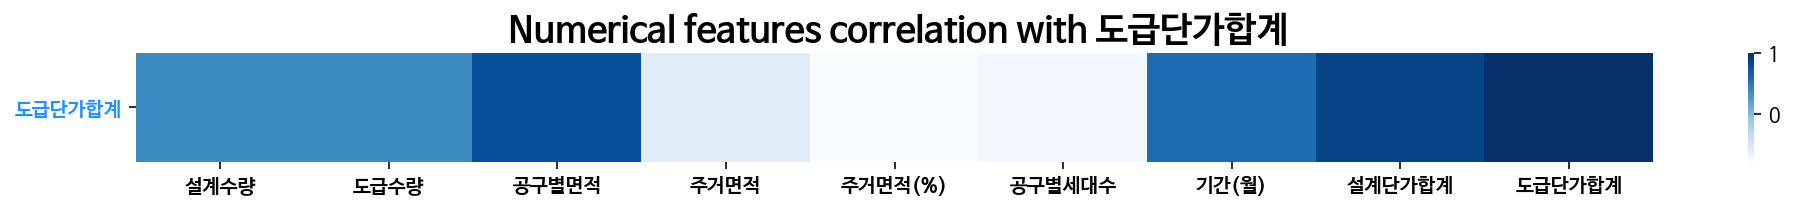

In [ ]:
num=all_flow.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['도급단가합계'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with 도급단가합계", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [ ]:
Num=numcorr['도급단가합계'].sort_values(ascending=False).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,도급단가합계
도급단가합계,1.000000
설계단가합계,0.862491
공구별면적,0.779244
기간(월),0.582485
설계수량,0.377822
도급수량,0.376229
주거면적,-0.576792
공구별세대수,-0.728365
주거면적(%),-0.781920


외부변수들과 단가간의 선형관계가 상당히 강한 것을 확인할 수 있음. 하지만 도시 자체가 5개 밖에 안되기 때문에 이 관계로 세부 공종들을 예측하는데 도움이 된다고 생각하면 안됨.
- 도급을 예측하는 것이 가장 중요하기 때문임.
- 설계단가를 예측모델에 넣는 것은 잘못된 생각임.

---

Flow Check 함수 생성

In [ ]:
def make_flow(df,st):
  all_flow=df.groupby(['도시',st])[['설계수량','설계재료비단가','설계노무비단가','설계경비단가','도급수량','도급재료비단가','도급노무비단가','도급경비단가']].sum().reset_index()
  all_flow=all_flow.merge(df[['도시',st,'공구별면적','주거면적','주거면적(%)','공구별세대수','기간(월)']],on=['도시',st],how='left').drop_duplicates()
  all_flow['설계단가합계'] = all_flow['설계재료비단가']+all_flow['설계노무비단가']+all_flow['설계경비단가']
  all_flow['도급단가합계'] = all_flow['도급재료비단가']+all_flow['도급노무비단가']+all_flow['도급경비단가']
  all_flow.drop(['설계재료비단가','설계노무비단가','설계경비단가','도급재료비단가','도급노무비단가','도급경비단가'],axis=1,inplace=True)

  return all_flow

# [도시,공사] Flow Check

In [ ]:
all_flow = make_flow(df,'공사')

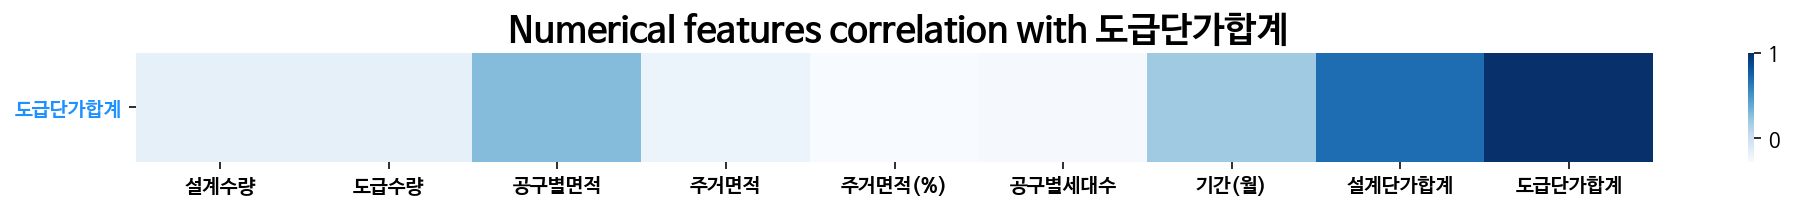

In [ ]:
num=all_flow.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['도급단가합계'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with 도급단가합계", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [ ]:
Num=numcorr['도급단가합계'].sort_values(ascending=False).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,도급단가합계
도급단가합계,1.000000
설계단가합계,0.698423
공구별면적,0.281308
기간(월),0.200222
설계수량,-0.163492
도급수량,-0.163515
주거면적,-0.200085
공구별세대수,-0.259369
주거면적(%),-0.276905


도시단위에서 좀더 세부적으로 공사단위까지 들어가게 되면 외부요인과의 상관관계가 낮아지는 경향이 있지만 의미가 없다고 판단할 수는 없음.

# [도시,공종명] Flow Check 

In [ ]:
all_flow=df.groupby(['도시','modified공종명'])[['설계수량','설계재료비단가','설계노무비단가','설계경비단가','도급수량','도급재료비단가','도급노무비단가','도급경비단가']].sum().reset_index()
all_flow=all_flow.merge(df[['도시','modified공종명','공구별면적','주거면적','주거면적(%)','공구별세대수','기간(월)']],on=['도시','modified공종명'],how='left').drop_duplicates()
all_flow['설계단가합계'] = all_flow['설계재료비단가']+all_flow['설계노무비단가']+all_flow['설계경비단가']
all_flow['도급단가합계'] = all_flow['도급재료비단가']+all_flow['도급노무비단가']+all_flow['도급경비단가']
all_flow.drop(['설계재료비단가','설계노무비단가','설계경비단가','도급재료비단가','도급노무비단가','도급경비단가'],axis=1,inplace=True)

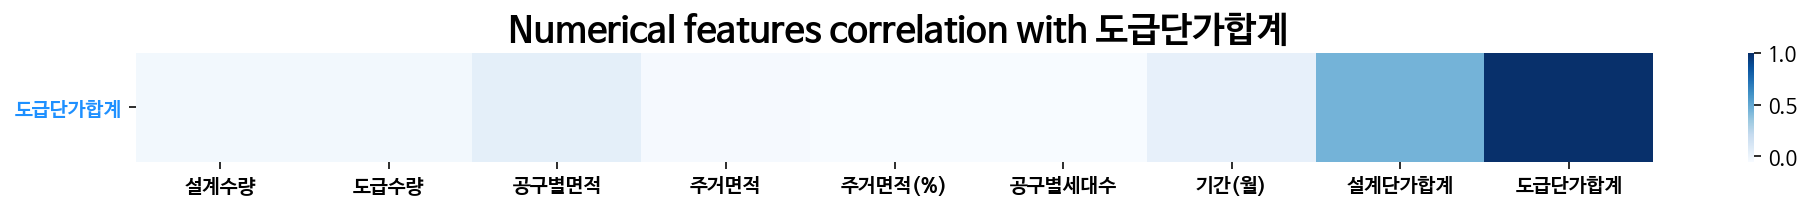

In [ ]:
num=all_flow.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['도급단가합계'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with 도급단가합계", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [ ]:
Num=numcorr['도급단가합계'].sort_values(ascending=False).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,도급단가합계
도급단가합계,1.000000
설계단가합계,0.454091
공구별면적,0.049002
기간(월),0.036819
도급수량,-0.024133
설계수량,-0.024145
주거면적,-0.036316
공구별세대수,-0.048257
주거면적(%),-0.049666


공종명 단위로 접근하게 되면 상관관계가 많이 떨어지게 된다. 
- 각 공종명들의 대표를 뽑아, 묶어주는 것이 바람직할 것 같음.

스토리텔링을 "제한적인 데이터를 활용하려고 하다보니 세부적인 공종명으로 접근할 수밖에 없다" 라는 식으로 시작을 해서, "세부적으로 접근하게 되면 추가된 외부변수와의 관계(여기서는 상관계수)가 상당히 약해지는 경향을 볼 수 있기 때문에 변수 내부요인을 통해 찾는 것이 바람직할 것이라고 판단

---

# 공종명에 대한 세부적인 고찰

## 1티어

### 토공사
- 합계금액/총합계금액으로 봤을때 비중차이가 크게 나는 것을 확인해 보자.

In [ ]:
def make_detection(df,num,name_gong):
  togong=df[df['공사']==name_gong].copy()
  togong['설계합계비중']=togong['설계합계금액']/togong['설계합계금액'].sum()
  togong['도급합계비중']=togong['도급합계금액']/togong['도급합계금액'].sum()
  togong['비중차이'] = togong['설계합계비중'] - togong['도급합계비중']
  return togong[abs(togong['비중차이'])>num][['modified공종명','설계합계비중','도급합계비중','비중차이']]

In [ ]:
make_detection(df[df['도시']=='동탄2'],0.01,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
1906,대규모발파,0.237877,0.222200,0.015678
1912,발파암소할,0.055897,0.076368,-0.020471
1934,외부반출토운반발파암,0.157106,0.139176,0.017930
1935,외부반출토운반토사,0.037403,0.013534,0.023868
1954,흙깍기공리핑암,0.033255,0.047116,-0.013861
1961,흙운반적재적하리핑암,0.061240,0.087060,-0.025820


In [ ]:
make_detection(df[df['도시']=='동탄3'],0.01,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
2580,대규모발파,0.098461,0.072865,0.025596
2591,발파암소할,0.049508,0.066625,-0.017117
2615,외부반출토운반리핑암,0.037329,0.050211,-0.012882
2616,외부반출토운반발파암,0.044554,0.059932,-0.015378
2617,외부반출토운반토사,0.038941,0.052352,-0.013411
2618,일반발파,0.142933,0.106773,0.036160
2624,중규모진동제어발파,0.064523,0.048148,0.016375
2639,흙깍기공리핑암,0.035640,0.047960,-0.012320
2646,흙운반적재적하리핑암,0.064864,0.087281,-0.022417
2647,흙운반적재적하발파암,0.169712,0.129575,0.040136


In [ ]:
make_detection(df[df['도시']=='동탄5'],0.01,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
3190,대규모발파,0.261313,0.219016,0.042297
3197,반출토운반적재적하발파암,0.047312,0.034595,0.012718
3200,발파암소할,0.066938,0.036880,0.030058
3208,순성토운반리핑암,0.031797,0.059363,-0.027566
3209,순성토운반발파암,0.044884,0.092134,-0.047250
3210,순성토운반토사,0.015128,0.030735,-0.015607
3213,외부반출토운반리핑암,0.007266,0.018203,-0.010937
3214,외부반출토운반발파암,0.018635,0.051351,-0.032716
3229,흙깍기공리핑암,0.067194,0.026087,0.041106
3236,흙운반적재적하리핑암,0.085248,0.073288,0.011960


In [ ]:
make_detection(df[df['도시']=='다산1'],0.001,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
668,고철설건축폐기물,-0.007113,-0.010991,0.003879
674,기존건축물철거,0.057297,0.058843,-0.001546


In [ ]:
make_detection(df[df['도시']=='다산2'],0.001,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
1212,고철설건축폐기물,-0.020692,-0.032212,0.011520
1213,고철설단지내할증,-0.012223,-0.018669,0.006446
1214,기존건축물철거,0.248083,0.257883,-0.009800
1219,덤프운반보통암,0.133773,0.135318,-0.001545
1220,덤프운반연암,0.262888,0.266049,-0.003161
1221,덤프운반토사,0.109662,0.110963,-0.001301


In [ ]:
make_detection(df[df['도시']=='광교1'],0.001,'토공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
291,대규모발파,0.061204,0.069320,-0.008117
292,동상방지층재생산및운반,0.025838,0.027299,-0.001461
306,식생기반재취부공법,0.032343,0.026099,0.006244
309,암적치장부지내운반,0.049269,0.052178,-0.002909
312,운반거리40m이내,0.046910,0.052173,-0.005263
313,일반발파,0.044841,0.050791,-0.005950
314,적치장가배수로,0.013691,0.015469,-0.001778
318,진동제어발파,0.028423,0.031819,-0.003396
323,토사,0.500529,0.467062,0.033467
325,포장자재기타골재,0.017983,0.019190,-0.001208


In [ ]:
# 도시별 이상치 concat
outlierC=pd.concat([
                    make_detection(df[df['도시']=='동탄2'],0.001,'토공사'),
                    make_detection(df[df['도시']=='동탄3'],0.001,'토공사'),
                    make_detection(df[df['도시']=='동탄5'],0.001,'토공사'),
                    make_detection(df[df['도시']=='다산1'],0.001,'토공사'),
                    make_detection(df[df['도시']=='다산2'],0.001,'토공사'),
                    make_detection(df[df['도시']=='광교1'],0.001,'토공사')])

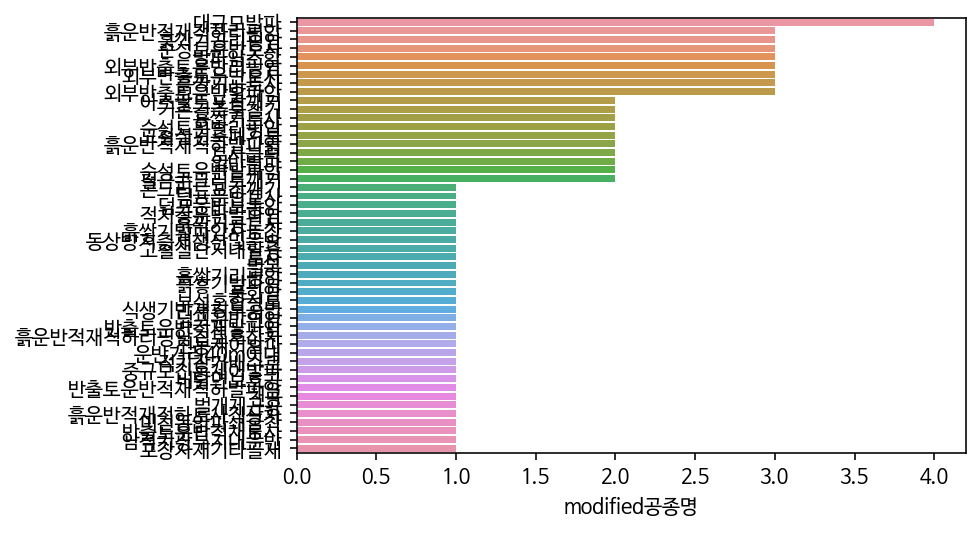

In [ ]:
sns.barplot(x=outlierC['modified공종명'].value_counts(),
            y=outlierC['modified공종명'].value_counts().index)

동탄같은 경우는 흙운반 및 발파암에서 꽤 큰 차이를 보이고 있음.
- 각각의 공종명들이 특정 외부요인가 어떤 상관이 있는지 찾기 어려울 경우, 공구별 각 공종들의 분포를 통해 유사도를 비교할 수 있는 함수를 만들면 좋을 것으로 판단됨.
- 발파암들이 의미하는 것이 최종적으로 무엇인지 판단할 수 있는 변수를 만들면 좋을 것 같음. 

In [ ]:
#함수 생성
def outlier_value_counts(df,num,name):
  outlierC=pd.concat([
                      make_detection(df[df['도시']=='동탄2'],num,name),
                      make_detection(df[df['도시']=='동탄3'],num,name),
                      make_detection(df[df['도시']=='동탄5'],num,name),
                      make_detection(df[df['도시']=='다산1'],num,name),
                      make_detection(df[df['도시']=='다산2'],num,name),
                      make_detection(df[df['도시']=='광교1'],num,name)])
  
  sns.barplot(x=outlierC['modified공종명'].value_counts(),
              y=outlierC['modified공종명'].value_counts().index)
  return outlierC.sort_values('비중차이',ascending=False)

### 도로 및 포장공사

,modified공종명,설계합계비중,도급합계비중,비중차이
2814,도막형바닥재,0.227238,0.026330,0.200908
2861,차선도색융착식도료형,0.089454,0.004072,0.085382
2851,자전거보관소설치,0.042279,0.000000,0.042279
1514,도로경계블럭설치,0.136709,0.111772,0.024937
2846,유공관설치,0.031494,0.010778,0.020716
412,기계식차선도색,0.031286,0.013046,0.018240
2199,경하중포장소형고압블록대규모,0.097408,0.081200,0.016208
958,기계식차선도색,0.026640,0.010466,0.016174
424,수동식차선도색,0.033371,0.018713,0.014658
960,도로경계블럭,0.122946,0.108488,0.014459


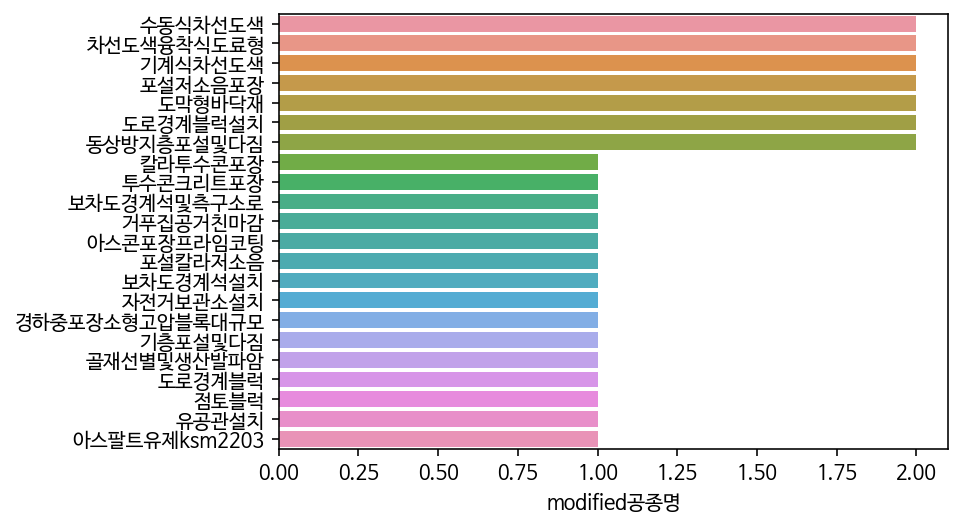

In [ ]:
outlier_value_counts(df,0.01,'도로및포장공사')

### 부대공사

,modified공종명,설계합계비중,도급합계비중,비중차이
2989,품질관리비품질시험비,0.141575,0.020958,0.120617
2950,임목폐기물운반,0.066434,0.000000,0.066434
470,비닐폴리에틸렌필름깔기,0.155076,0.106558,0.048518
2897,공사현장살수,0.068432,0.020958,0.047474
125,굴절투명방음벽,0.238229,0.193045,0.045183
143,플라스틱투명방음벽,0.288374,0.245845,0.042529
1004,목재형방음판,0.177528,0.136886,0.040641
1660,품질시험비,0.176406,0.141651,0.034755
2882,가설건물난방위생설비공사,0.070675,0.036782,0.033893
462,목재형방음판,0.167285,0.135989,0.031296


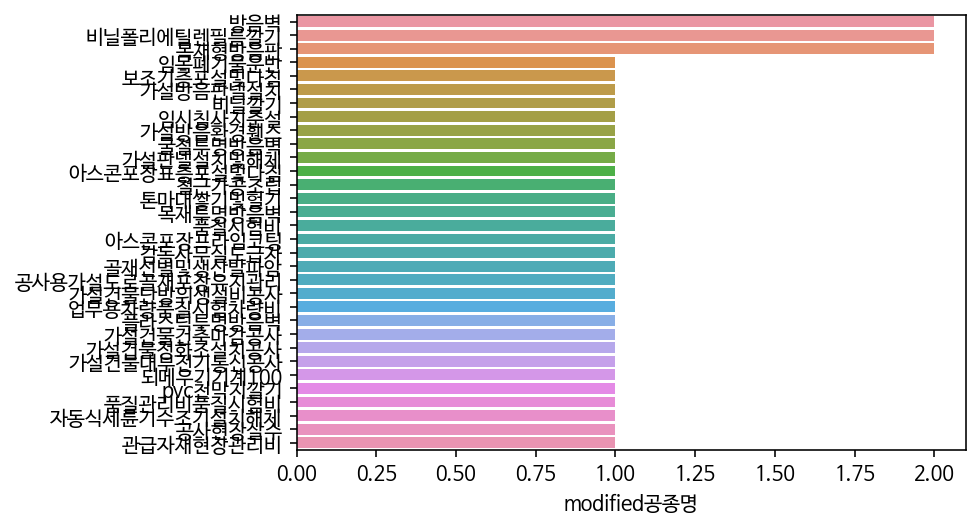

In [ ]:
outlier_value_counts(df,0.01,'부대공사')

### 우수공사

,modified공종명,설계합계비중,도급합계비중,비중차이
3143,되메우기토사기계100,0.095211,0.045925,0.049286
3147,모래,0.046291,0.000224,0.046067
1879,초기우수처리장치sbb,0.106216,0.078767,0.027450
1882,초기우수처리장치sbe,0.075168,0.047806,0.027362
1878,초기우수처리장치sba,0.058827,0.037390,0.021438
1887,초기우수처리장치sbj,0.032682,0.012983,0.019699
3139,거푸집공유로폼,0.211770,0.194234,0.017536
1894,토사터파기,0.025585,0.010037,0.015547
1854,석분,0.031862,0.018061,0.013801
1881,초기우수처리장치sbd,0.035950,0.022916,0.013034


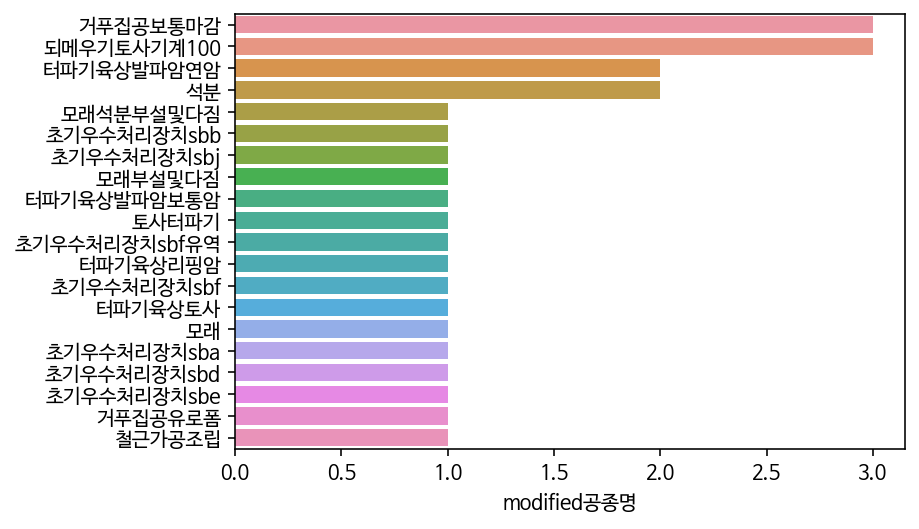

In [ ]:
outlier_value_counts(df,0.01,'우수공사')

###오수공사

,modified공종명,설계합계비중,도급합계비중,비중차이
1790,레진콘크리트관,0.178056,0.113217,0.064839
3097,되메우기토사기계100,0.089236,0.050339,0.038898
3121,터파기육상리핑암,0.191425,0.155034,0.036391
3112,원형맨홀벽체강재거푸집,0.043168,0.017201,0.025967
2444,sheetpile구입운반,0.127941,0.102514,0.025427
1797,모래기초부설,0.023742,0.007539,0.016203
1822,하수관거내부검사,0.019333,0.004447,0.014886
1803,석분기초용,0.025576,0.011737,0.013839
1811,인입관로유도장치통합맨홀,0.043865,0.030289,0.013576
1820,터파기육상발파암,0.080487,0.090736,-0.010249


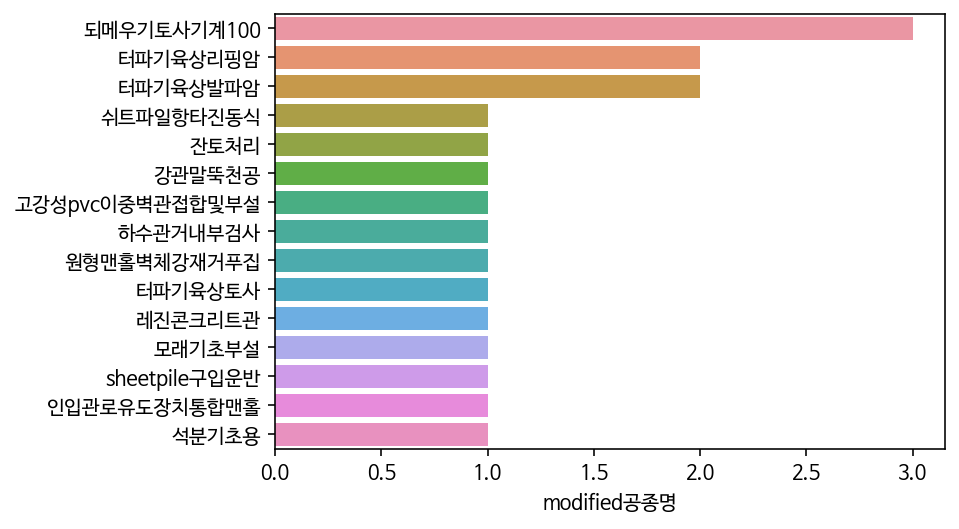

In [ ]:
outlier_value_counts(df,0.01,'오수공사')

## 2티어
- 구조물공사,교량공사,상수공사,가로수식재공사

### 구조물공사

,modified공종명,설계합계비중,도급합계비중,비중차이
2184,산석조경석,0.287450,0.078742,0.208708
1488,강봉보강재,0.276176,0.187241,0.088935
1502,지오그리드연성,0.166983,0.129201,0.037783
1497,보강토블럭운반eyestone,0.024865,0.002327,0.022539
1498,보강토블럭운반reco블럭,0.021485,0.002750,0.018734
0,강관파일기초,0.935148,0.945453,-0.010305
1489,강봉보강재설치,0.071911,0.085699,-0.013788
400,차량방호책,0.005139,0.020242,-0.015104
2172,거푸집보통마감,0.036851,0.056015,-0.019164
2179,보강토부설및다짐,0.055240,0.083971,-0.028732


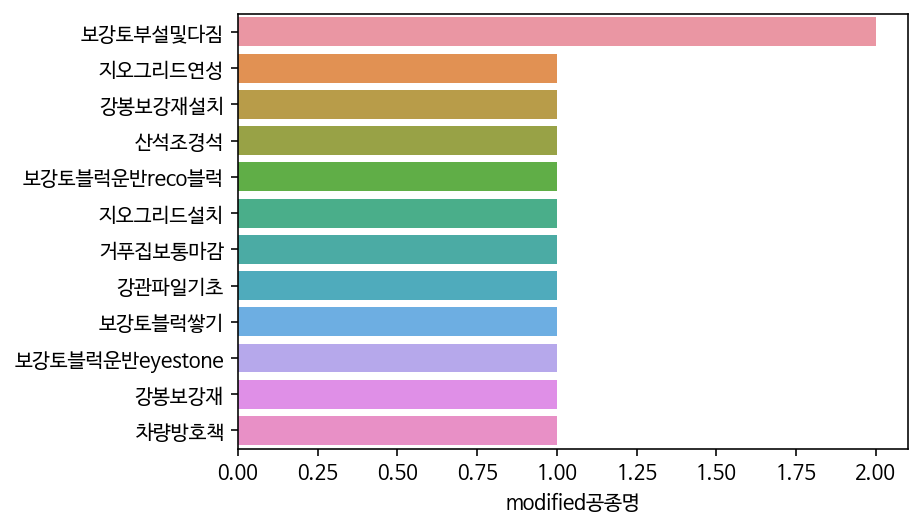

In [ ]:
outlier_value_counts(df,0.01,'구조물공사')

### 교량공사

,modified공종명,설계합계비중,도급합계비중,비중차이
2796,합성형라멘제작,0.378804,0.211738,0.167065
2744,교량배수시설,0.047081,0.001272,0.045808
2734,강관동바리,0.071327,0.031276,0.040051
1297,가로등설치,0.021011,0.000000,0.021011
1430,엘리베이터설치,0.015458,0.000000,0.015458
1446,자연형돌계단,0.053779,0.038363,0.015416
2035,f170ta100m,0.012436,0.000000,0.012436
2037,igirder제작,0.112019,0.100356,0.011663
1303,강관말뚝자재비,0.039681,0.029419,0.010262
1370,목재동바리,0.018897,0.031041,-0.012144


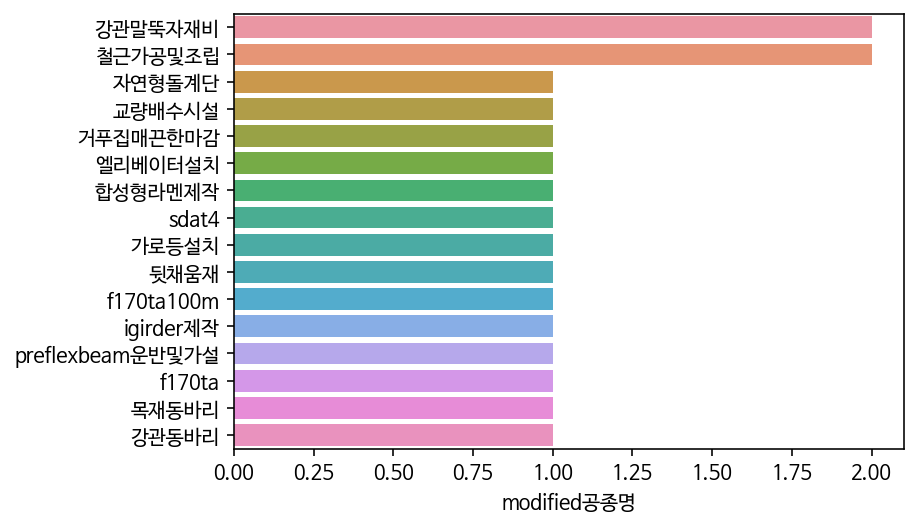

In [ ]:
outlier_value_counts(df,0.01,'교량공사')

### 상수공사

상수도공사를 상수공사로 바꿔주자.

In [ ]:
df.loc[df['공사']=='상수도공사','공사'] = '상수공사'

,modified공종명,설계합계비중,도급합계비중,비중차이
1723,수도용닥타일주철관에폭시분체도장,0.316057,0.259438,0.056619
3008,가압펌프설치공사tmtc포함,0.056259,0.001552,0.054707
3078,표준형세척밸브,0.059488,0.007762,0.051726
2395,수도용닥타일주철관시멘트라이닝,0.283066,0.257095,0.025971
1098,주철관시멘트라이닝닥터일,0.069486,0.049148,0.020339
3073,터파기육상리핑암,0.050944,0.030675,0.020269
1694,닥타일주철이형관에폭시분체도장,0.034365,0.015414,0.018951
1673,가압펌프설치공사tmtc포함,0.016257,0.000213,0.016044
3034,상수도가압펌프스텐인레스,0.017680,0.003105,0.014575
3021,되메우기토사기계100,0.022072,0.009257,0.012815


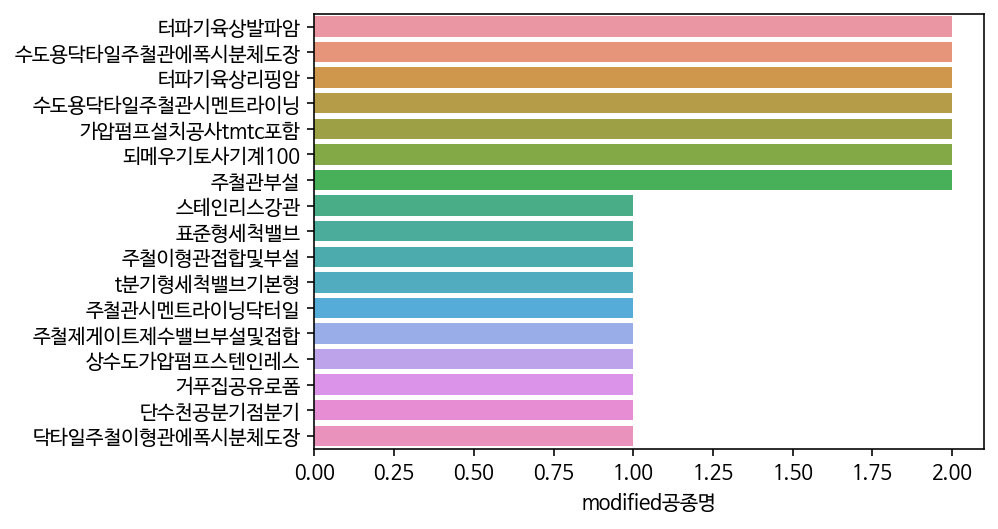

In [ ]:
outlier_value_counts(df,0.01,'상수공사')

,modified공종명,설계합계비중,도급합계비중,비중차이
2715,수목보호대,0.088502,0.000000,0.088502
344,빗물관리보호덮개중앙분리대,0.236585,0.167776,0.068809
746,빗물관리보호덮개중앙분리대,0.140063,0.095778,0.044285
2717,이팝나무,0.617522,0.578944,0.038578
2718,자산홍,0.085751,0.097537,-0.011786
2712,백철쭉,0.118979,0.142545,-0.023566
2719,흰말채나무,0.035954,0.122925,-0.086971


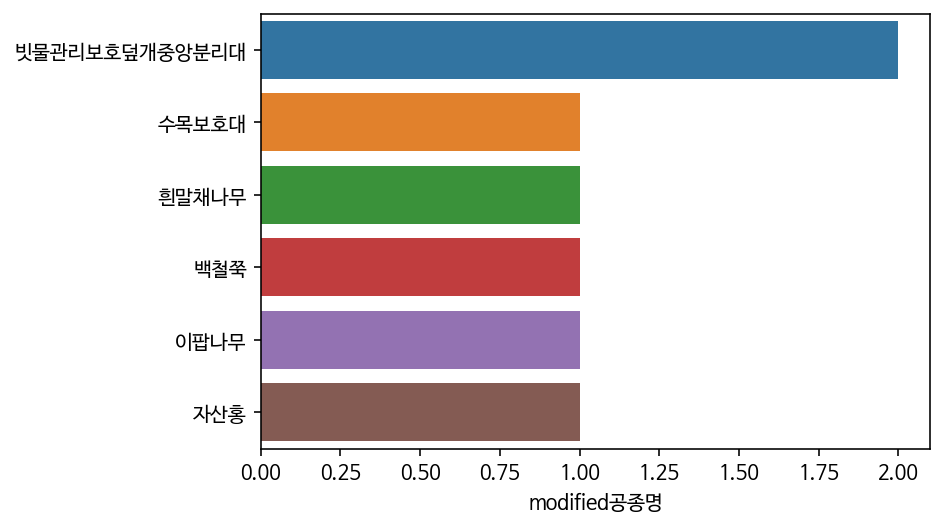

In [ ]:
outlier_value_counts(df,0.01,'가로수식재공사')